<a href="https://colab.research.google.com/github/kritikjsh/Concrete-Strength-Prediction-Model/blob/main/CONCRETE_STRENGTH_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Concrete Compressive Strength Prediction**

Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. The Compressive Strength of Concrete is a highly nonlinear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.

Our PR project demonstrates the use of Machine Learning to predict Concrete Compressive Strength.

# **Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.**

# **importing the necessary libraries**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# **setting the no.of rows and columns**

In [ ]:
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',1000)

# **getting the data**

In [ ]:
data = pd.read_excel('/content/Concrete_Data.xls')

# **printing the data only top 5**

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
len(data)

1030

# **Simplifying data according to convinience.**

In [ ]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer","CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]

curr_col_names = list(data.columns)

mapper = {}
for i,name in enumerate(curr_col_names):
  mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [ ]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
data.shape

(1030, 9)

total 1030 observations and 9 features

# **DATA CLEANING**

# **CHECKING FOR NULL VALUES**

In [ ]:
data.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

there are no null values in the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# **exploratory data analysis**

# **exploring the data**

In [ ]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# **checking the pairwise relations**

# **multi variate analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

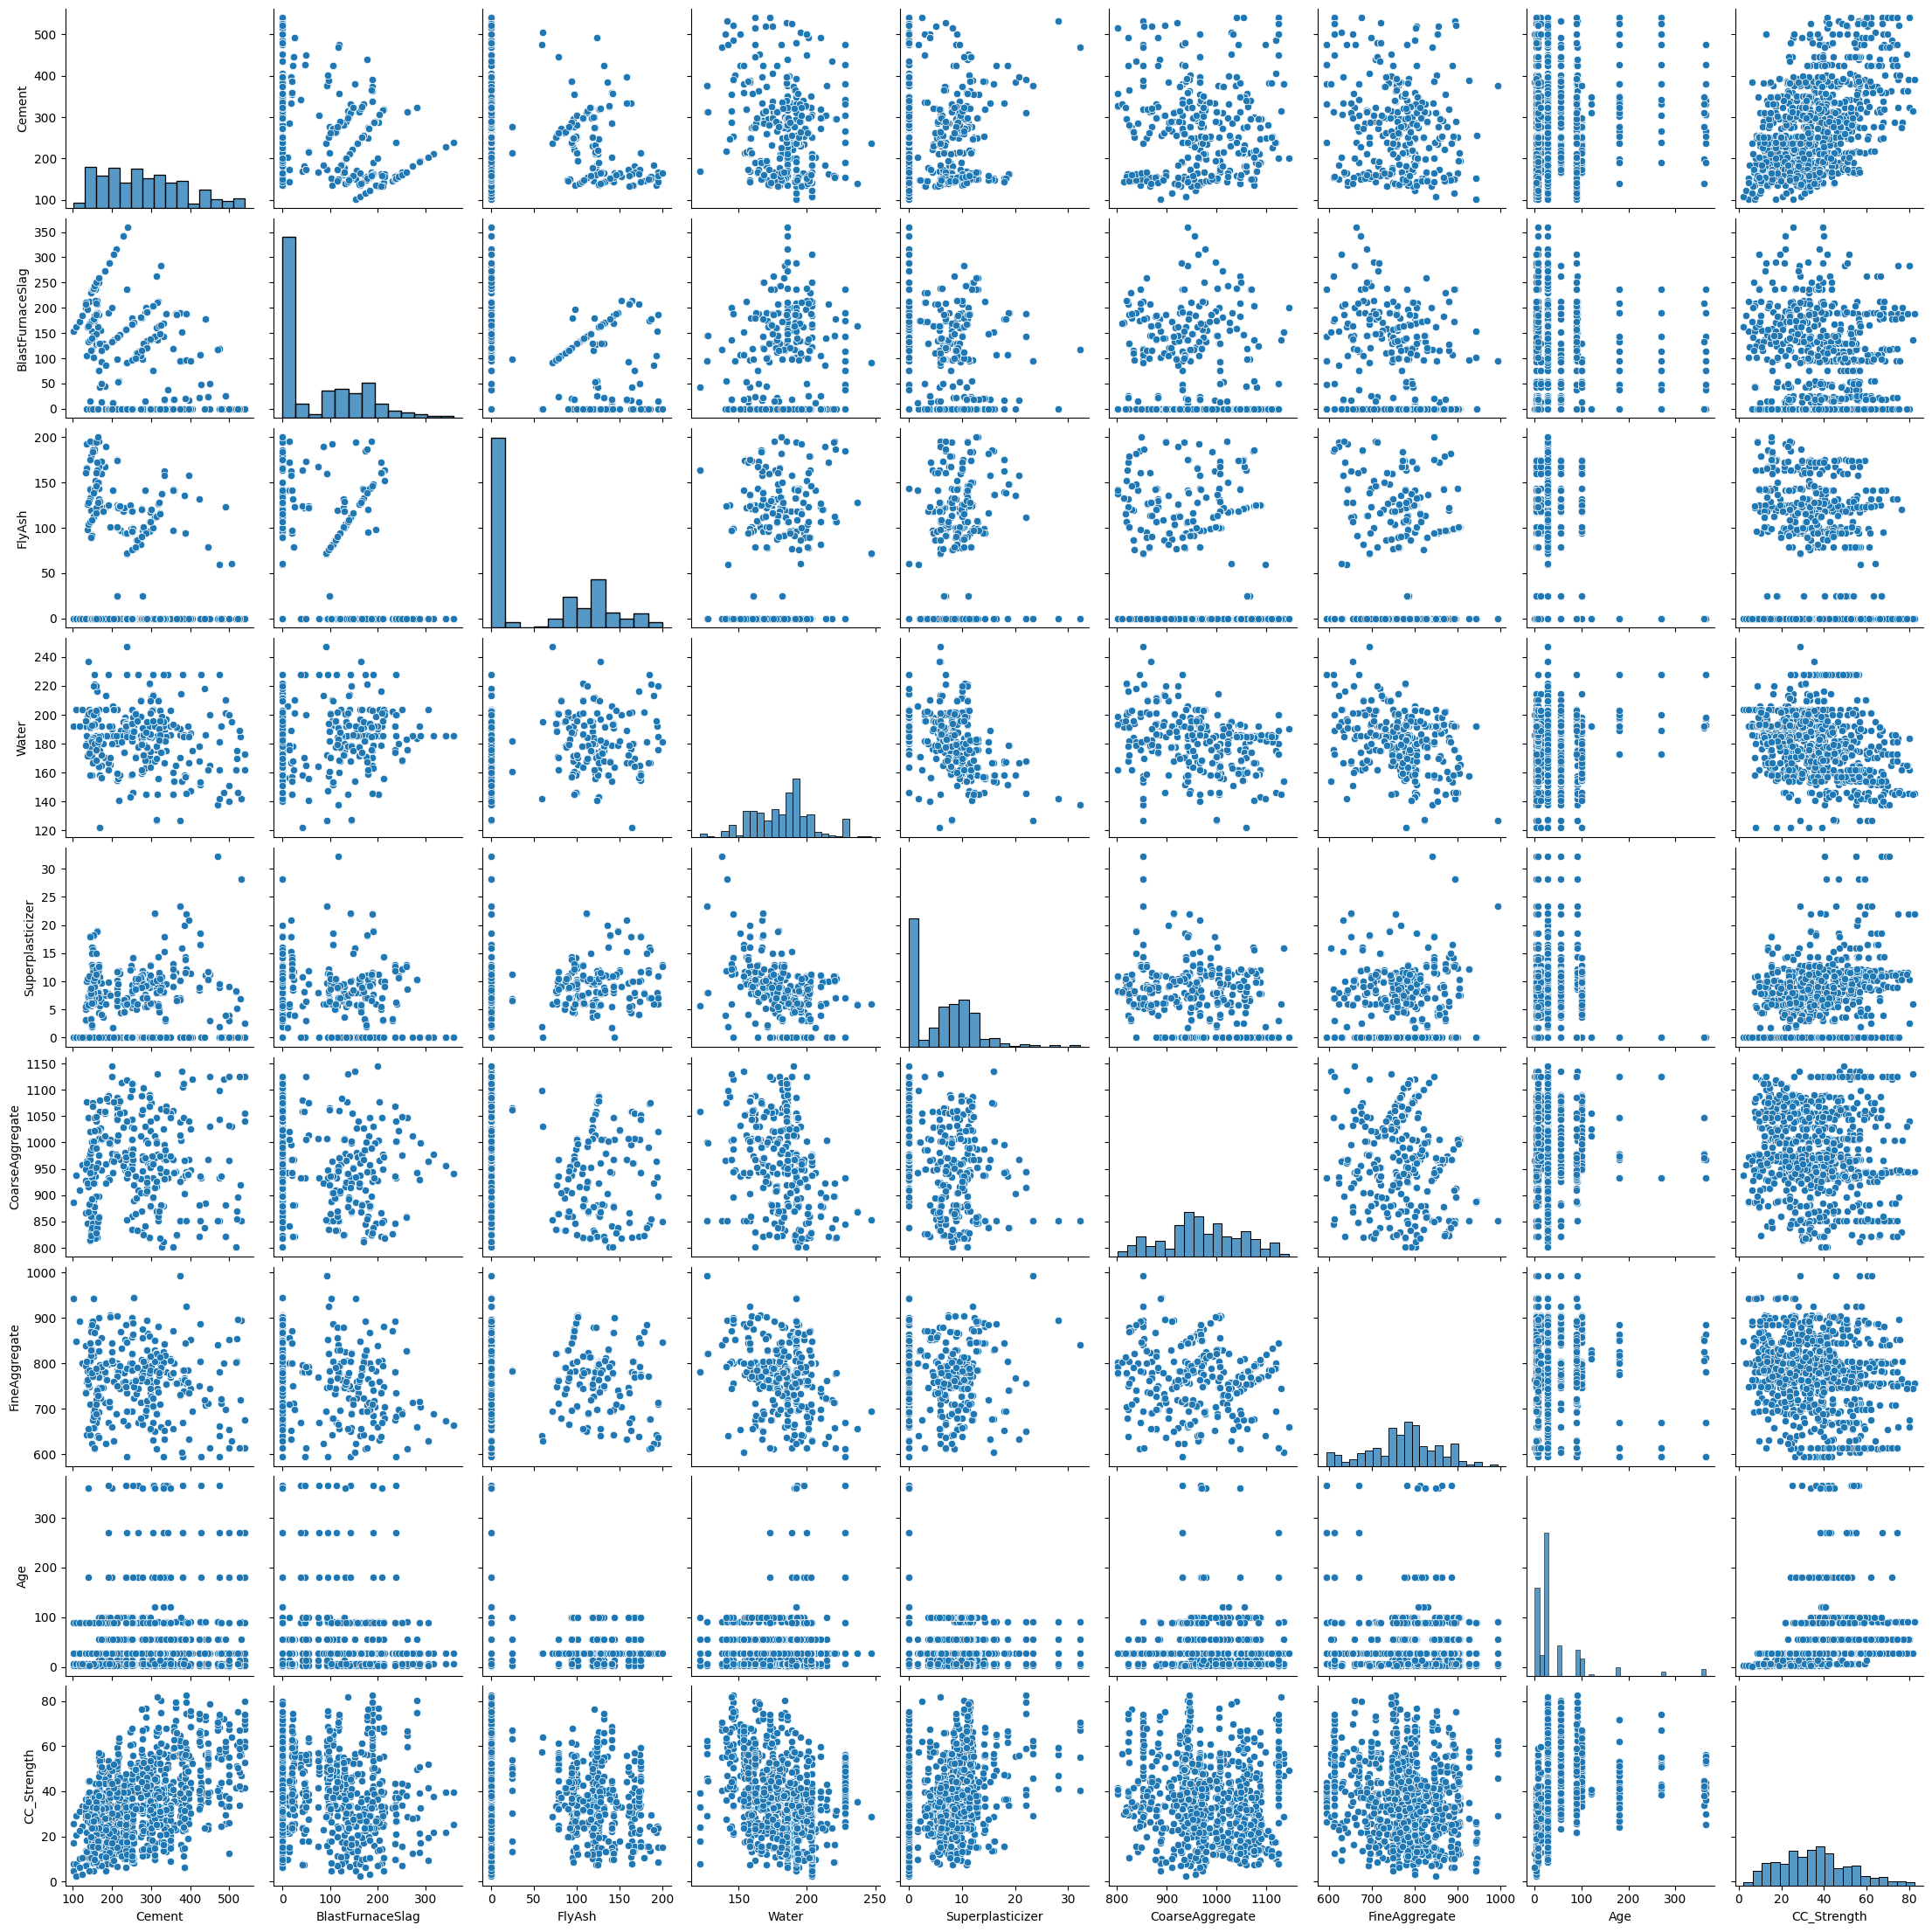

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the variables
# Make sure 'data' contains the variables you want to visualize

# Define a list of colors for each pair of plots
color_palette = sns.color_palette("husl", n_colors=len(data.columns)**2)

# Create a pairplot with different colors for each pair of plots
sns.pairplot(data, palette=color_palette)

# Display the plot
plt.show()


no correlation between independent variables

This can be further confirmed by plotting the Pearson Correlation coefficients between the features.

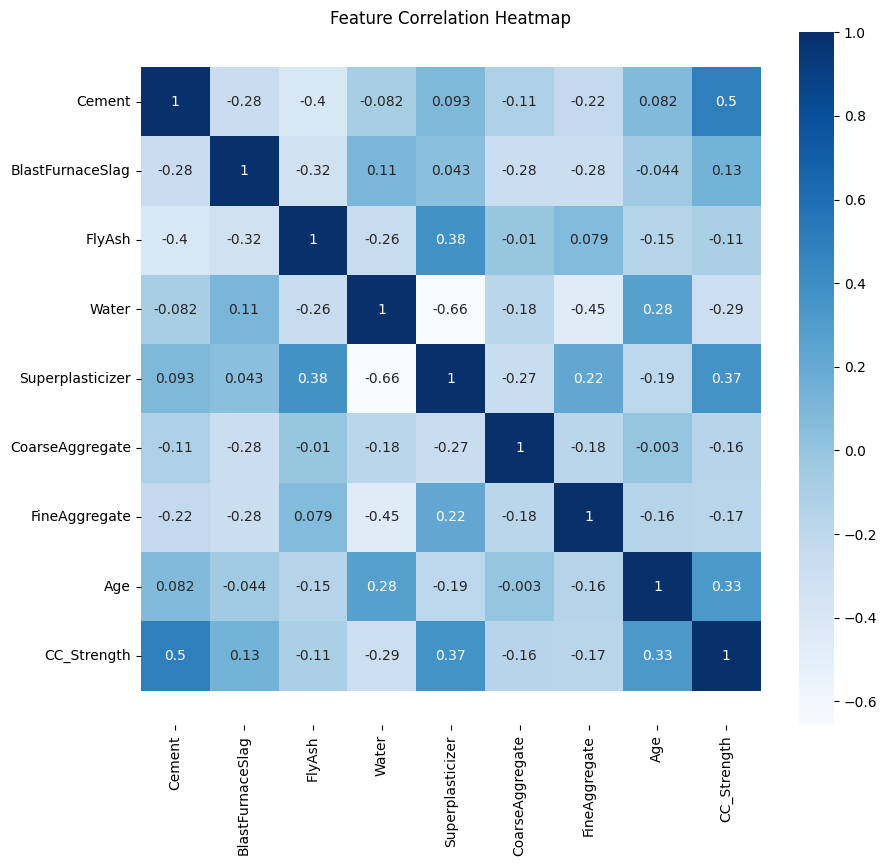

In [ ]:
corr = data.corr()

plt.figure(figsize= (10,9))
sns.heatmap(corr, annot = True, cmap = 'Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **observations**

# **There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.**

# **Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.**

# **Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.**

We can further analyze these correlations visually by plotting these relations.

# features in the data

In [ ]:
data.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

<ipython-input-50-1bf6ee9b370a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['CC_Strength'])


Text(0.5, 1.0, 'Compressive Strength Distribution')

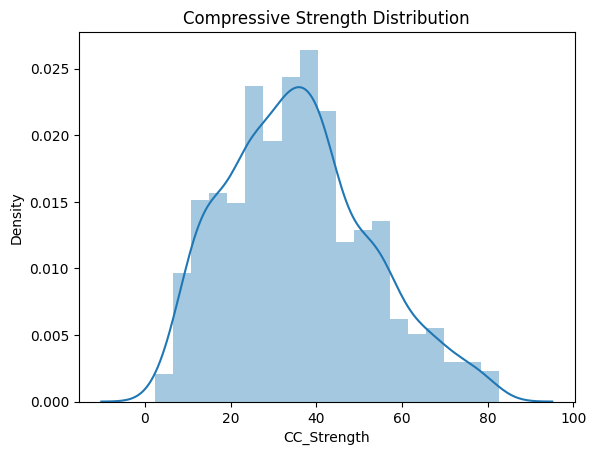

In [ ]:
ax = sns.distplot(data['CC_Strength'])
ax.set_title('Compressive Strength Distribution')

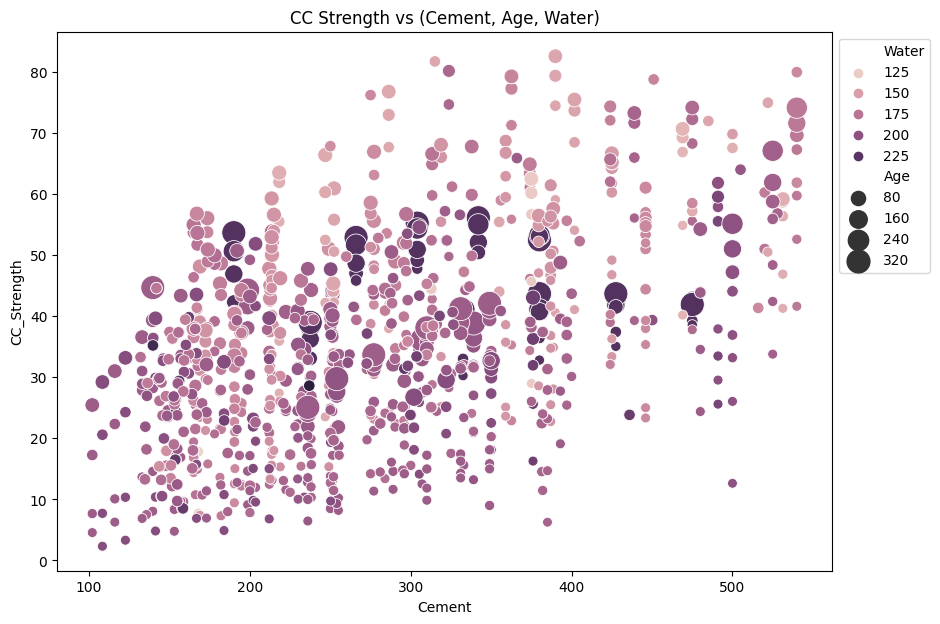

In [ ]:
fig,ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y='CC_Strength',x='Cement',hue="Water", size="Age",data=data,ax=ax,sizes= (50,300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# **Observations from Strength vs (Cement, Age, Water)**

# **1) Compressive strength increases with amount of cement**

# **2)Compressive strength increases with age**

# **3) Cement with low age requires more cement for higher strength**

# **4) The older the cement is the more water it requires**

# **5) Concrete strength increases when less water is used in preparing it**

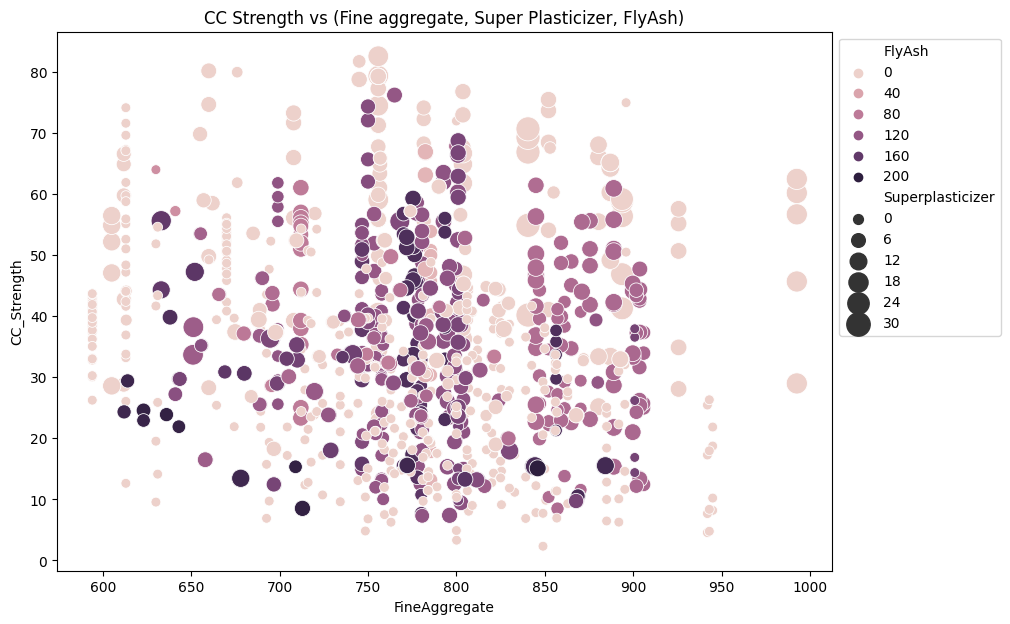

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="FlyAsh", size="Superplasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()


# **Observations from CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)**

# **As Flyash increases the strength decreases**

# **Strength increases with Super plasticizer**

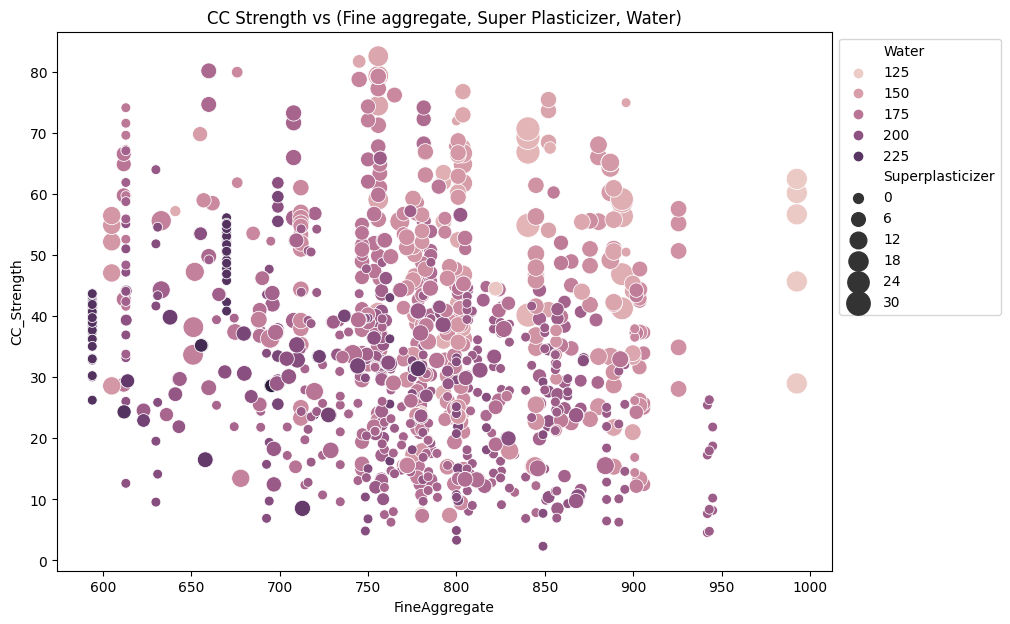

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="CC_Strength", x="FineAggregate", hue="Water", size="Superplasticizer", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# **Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)**

# **Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)**

# **More Fine aggregate is used when less water, more Super plasticizer is used.**

# **Although we are making conclusions by observing the scatter plots, there is an underlying non linear interaction between features which we cannot visualize**

We can visually understand 2D, 3D and max upto 4D plots (by 4D I mean color and size represented by features) as shown above, we can further use row wise and column wise plotting features by seaborn to do further analysis, but still we lack the ability to track all these correlations by ourselves. For this reason, we can turn to Machine Learning to capture these relations and give better insights into the problem.

Fom here we will start processing the data and feed it to machine learning models to correctly predict the Compressive Strength of Concrete given the input features.

# **Data Preprocessing**

# **Separating Input Features and Target Variable.**

In [ ]:
X = data.iloc[:,:-1]
# Features - All columns but last
y = data.iloc[:,-1]
# Target - Last Column

# **Splitting data into Training and Test splits**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# **Scaling**

# **Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

# **Model Building**

Training Machine Learning Algorithms on the training data and making predictions on Test data.

# **Linear Regression**

# **The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function.**

# **The objective function used in this case is Mean Squared Error**

There are three versions of Linear Regression

1) Linear Regression - No regularisation

2)Lasso Regression - L1 regularisation (Tries to push coefficients to zero)

3)Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)

---



We will compare these three algorithms

In [ ]:
lr = LinearRegression()
# Linear Regression

lasso = Lasso()
# Lasso Regression

ridge = Ridge()
# Ridge Regression

# **fitting models on Training data**

In [ ]:
lr.fit(x_train, y_train)
# fitting the linear regression model

LinearRegression()

In [ ]:
lasso.fit(x_train, y_train)
# fitting lasso regression model

Lasso()

In [ ]:
ridge.fit(x_train, y_train)
# fitting the ridge regression model

Ridge()

# **Making predictions on Test data**

In [ ]:
y_pred_lr = lr.predict(x_test)
# predicting the test with linear regression model

In [ ]:
y_pred_lasso = lasso.predict(x_test)
# predicting the test with lasso regression model

In [ ]:
y_pred_ridge = ridge.predict(x_test)
# predicting the test with ridge regression model

# **Evaluation**

# **Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.**

# **linear regression results**

In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57


# **lasso regression results**

In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LassoRegression 	 10.68 		 114.13 	8.66 		0.54


# **Ridge Regression results**

In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


In [ ]:

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))

print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))



Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


# **The performance seem to be similar with all the three methods.**

# **Plotting the coefficients**

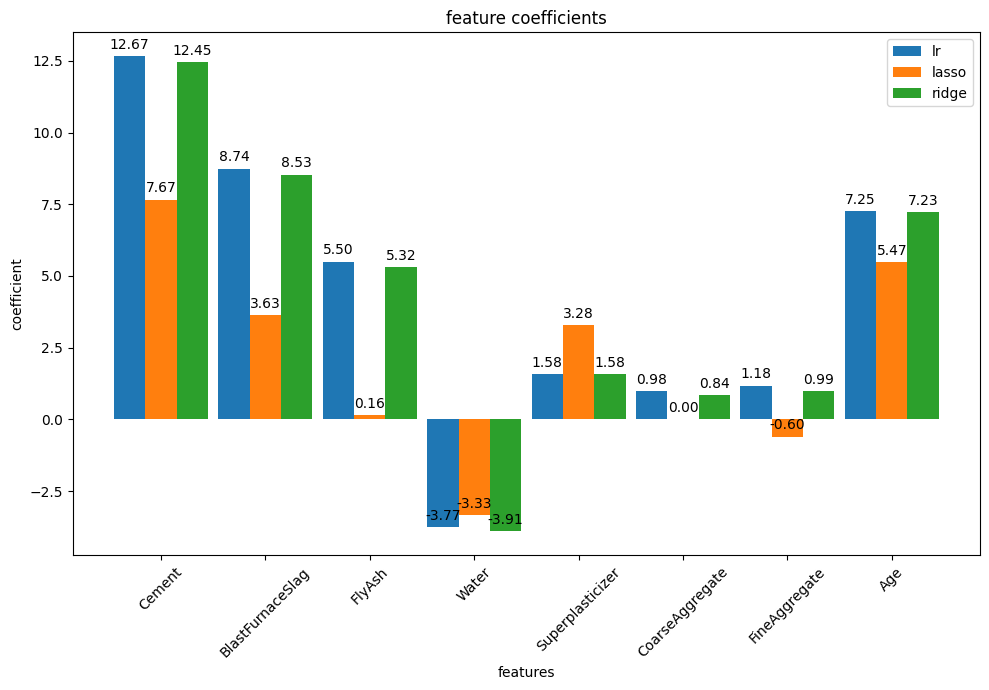

In [ ]:
coeff_lr = lr.coef_
#linear regression coefficients
coeff_lasso = lasso.coef_
#lasso regression coefficients
coeff_ridge = ridge.coef_
#ridge regression coefficients

labels = req_col_names[:-1]

x = np.arange(len(labels))
width = 0.3

fig,ax = plt.subplots(figsize = (10,7))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label = 'lr')
rects2 = ax.bar(x, coeff_lasso, width, label = 'lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label = 'ridge')

ax.set_ylabel('coefficient')
ax.set_xlabel('features')
ax.set_title('feature coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 45)
ax.legend()

def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height), xy = (rect.get_x() + rect.get_width() / 2, height),
                 xytext = (0, 3), textcoords = 'offset points', ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# **Lasso Regression, reduces the complexity of the model by keeping the coefficients as low as possible.**

# **Coefficients with Linear and Ridge are almost same.**

# **Plotting Predictions**

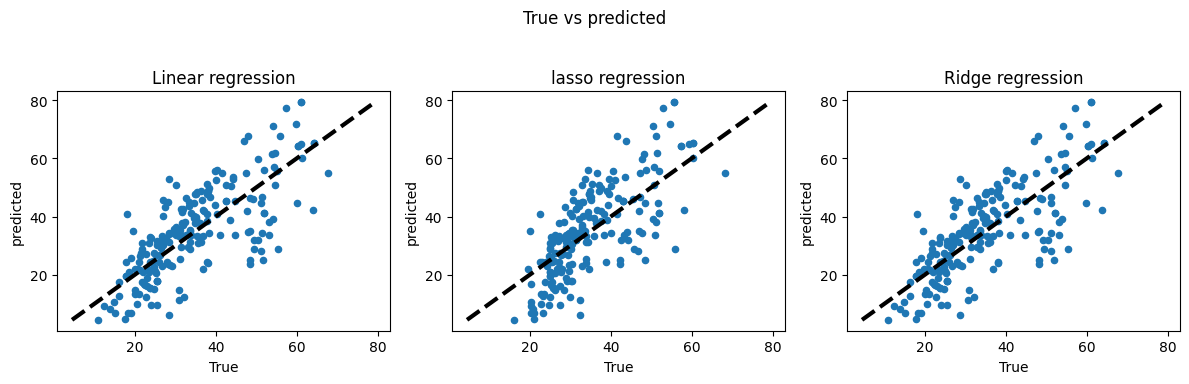

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax1.set_xlabel('True')
ax1.set_ylabel('predicted')
ax1.set_title('Linear regression')


ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax2.set_xlabel('True')
ax2.set_ylabel('predicted')
ax2.set_title('lasso regression')


ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax3.set_xlabel('True')
ax3.set_ylabel('predicted')
ax3.set_title('Ridge regression')

fig.suptitle('True vs predicted')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])




# **Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values.**

# **While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)**

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 27.289124676297345
